In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from wordcloud import WordCloud
import json
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
import re

# 探索的データ分析

In [4]:
#データ読み込み
DATA_IN_PATH = './date_in/'  #./ 는 현재경로
train_data=pd.read_csv( DATA_IN_PATH + 'labeledTrainData.tsv',header=0,delimiter="\t",quoting=3)
train_data.head()

,id,sentiment,review
0,"""5814_8""",1,"""With all this stuff going down at the moment ..."
1,"""2381_9""",1,"""\""The Classic War of the Worlds\"" by Timothy ..."
2,"""7759_3""",0,"""The film starts with a manager (Nicholas Bell..."
3,"""3630_4""",0,"""It must be assumed that those who praised thi..."
4,"""9495_8""",1,"""Superbly trashy and wondrously unpretentious ..."


리뷰길이 최댓값 : 13710
리뷰길이 최솟값 : 54
리뷰길이 평균값 : 1329.71056
리뷰길이 표준편차값 : 1005.2191407969154
리뷰길이 중간값 : 983.0
리뷰길이 1사분위 : 705.0
리뷰길이 3사분위 : 1619.0


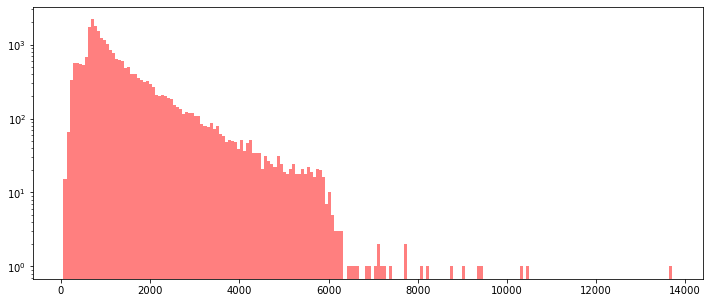

In [8]:
#レビュー長さの分析
train_length=train_data['review'].apply(len)
plt.figure(figsize=(12,5))
plt.hist(train_length,bins=200,alpha=0.5,color="r",label='word')
plt.yscale('log')

print('全体学習データ数 : {}'.format(len(train_data)))
print('レビュー長さmax : {}'.format(np.max(train_length)))
print('レビュー長さmin : {}'.format(np.min(train_length)))
print('レビュー長さmean : {}'.format(np.mean(train_length)))
print('レビュー長さstd : {}'.format(np.std(train_length)))
print('レビュー長さmedian : {}'.format(np.median(train_length)))
print('レビュー長さ25% : {}'.format(np.percentile(train_length,25)))
print('レビュー長さ75% : {}'.format(np.percentile(train_length,75)))

{'whiskers': [<matplotlib.lines.Line2D at 0x239077dc9a0>,
 'caps': [<matplotlib.lines.Line2D at 0x239077dcfa0>,
 'boxes': [<matplotlib.lines.Line2D at 0x239077dc6d0>],
 'medians': [<matplotlib.lines.Line2D at 0x239077e8550>],
 'fliers': [<matplotlib.lines.Line2D at 0x239077e8af0>],
 'means': [<matplotlib.lines.Line2D at 0x239077e8820>]}

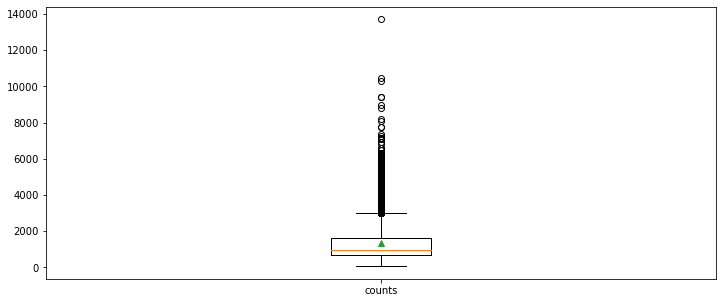

In [9]:
#boxplotで確認
plt.figure(figsize=(12,5))
plt.boxplot(train_length,labels=['counts'],showmeans=True)

(-0.5, 799.5, 599.5, -0.5)

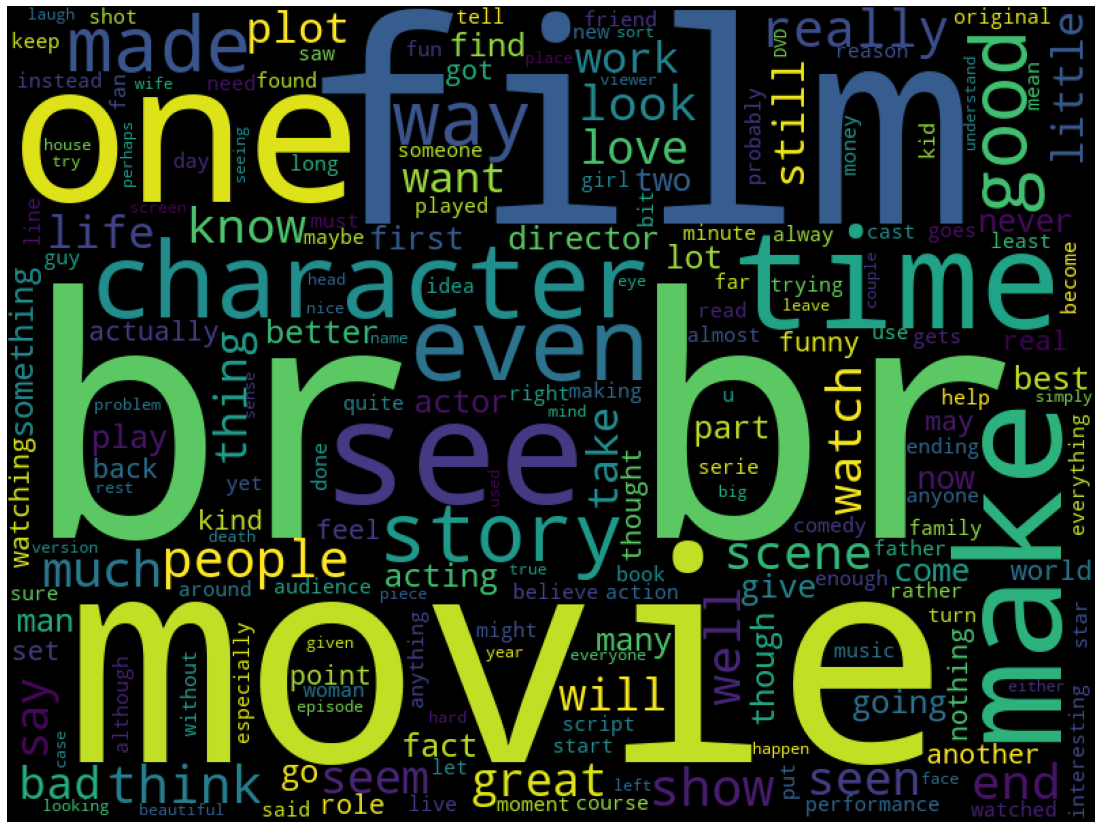

In [10]:
#ワードクラウド
cloud=WordCloud(width=800, height=600).generate("".join(train_data['review']))
plt.figure(figsize=(20,15))
plt.imshow(cloud)
plt.axis('off')

긍정 리뷰 수 :12500
부정 리뷰 수 :12500


C:\Users\kimpa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


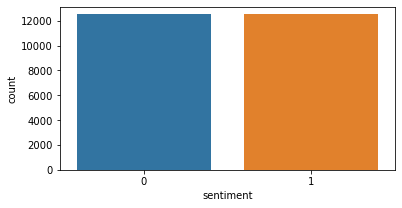

In [11]:
#ラベル分布
fig,axe=plt.subplots(ncols=1)
fig.set_size_inches(6,3) 
sns.countplot(train_data['sentiment'])
print("positive :{}".format(train_data['sentiment'].value_counts()[1]))
print("negative :{}".format(train_data['sentiment'].value_counts()[0]))

In [ ]:
train_word_counts=train_ dat apply(lambda x: len(x.split(' ')))
plt.figure(figsize=(15,1 min 
plt.hist(train_worレビュー単語数,mean s=50,facecolor='r',label='train')
plt.yscale('log')
plt.legend()
plt.xlabel('words',fontsize=15)
plt.ylabel('reivew',fontsize=15)

print('レビュー単語数 max :{}'.format(np.max(train_word_counts)))
print('レビュー単語数 min :{}'.format(np.min(train_word_counts)))
print('レビュー単語数 mean :{}'.format(np.mean(train_word_counts)))
print('レビュー単語数 std:{}'.format(np.std(train_word_counts)))
print('レビュー単語数 median:{}'.format(np.median(train_word_counts)))
print('レビュー単語数 25% :{}'.format(np.percentile(train_word_counts,25)))
print('レビュー単語数 75%:{}'.format(np.percentile(train_word_counts,75)))

# データ前処理

In [18]:
#データcleansing例題
review=train_data['review'][0]
review_text=BeautifulSoup(review,"html").get_text()
review_text=re.sub("[^a-zA-Z]"," ",review_text)
print(review_text)

 With all this stuff going down at the moment with MJ i ve started listening to his music  watching the odd documentary here and there  watched The Wiz and watched Moonwalker again  Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent  Moonwalker is part biography  part feature film which i remember going to see at the cinema when it was originally released  Some of it has subtle messages about MJ s feeling towards the press and also the obvious message of drugs are bad m kay Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring  Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him The actual feature film bit when it finally starts is only on for    mi

In [19]:
#stop word設定
stop_words=set(stopwords.words('english'))
review_text=review_text.lower()
words=review_text.split()
words=[w for w in words if not w in stop_words]
print(words)

['stuff', 'going', 'moment', 'mj', 'started', 'listening', 'music', 'watching', 'odd', 'documentary', 'watched', 'wiz', 'watched', 'moonwalker', 'maybe', 'want', 'get', 'certain', 'insight', 'guy', 'thought', 'really', 'cool', 'eighties', 'maybe', 'make', 'mind', 'whether', 'guilty', 'innocent', 'moonwalker', 'part', 'biography', 'part', 'feature', 'film', 'remember', 'going', 'see', 'cinema', 'originally', 'released', 'subtle', 'messages', 'mj', 'feeling', 'towards', 'press', 'also', 'obvious', 'message', 'drugs', 'bad', 'kay', 'visually', 'impressive', 'course', 'michael', 'jackson', 'unless', 'remotely', 'like', 'mj', 'anyway', 'going', 'hate', 'find', 'boring', 'may', 'call', 'mj', 'egotist', 'consenting', 'making', 'movie', 'mj', 'fans', 'would', 'say', 'made', 'fans', 'true', 'really', 'nice', 'actual', 'feature', 'film', 'bit', 'finally', 'starts', 'minutes', 'excluding', 'smooth', 'criminal', 'sequence', 'joe', 'pesci', 'convincing', 'psychopathic', 'powerful', 'drug', 'lord', 

In [21]:
#stop word除去
clean_review=' '.join(words)
print(clean_review)

stuff going moment mj started listening music watching odd documentary watched wiz watched moonwalker maybe want get certain insight guy thought really cool eighties maybe make mind whether guilty innocent moonwalker part biography part feature film remember going see cinema originally released subtle messages mj feeling towards press also obvious message drugs bad kay visually impressive course michael jackson unless remotely like mj anyway going hate find boring may call mj egotist consenting making movie mj fans would say made fans true really nice actual feature film bit finally starts minutes excluding smooth criminal sequence joe pesci convincing psychopathic powerful drug lord wants mj dead bad beyond mj overheard plans nah joe pesci character ranted wanted people know supplying drugs etc dunno maybe hates mj music lots cool things like mj turning car robot whole speed demon sequence also director must patience saint came filming kiddy bad sequence usually directors hate working

In [22]:
#data cleansing関数の定義
def preprocessing(review, remove_stopwords= False):
    review_text=BeautifulSoup(review,"html").get_text()
    review_text=re.sub("[^a-zA-Z]"," ",review_text)
    review_text=review_text.lower()
    words=review_text.split()
    
    if remove_stopwords:
        stop_words=set(stopwords.words('english'))
        words=[w for w in words if not w in stop_words]
        clean_review=' '.join(words)
    
    else:
        clean_review = ' '.join(words)
        
    return clean_review

In [24]:
#全体データのcleansing
review=train_data['review']
clean_train_review=[]
for review in train_data['review']:
    clean_train_review.append(preprocessing(review, remove_stopwords= True))
    

#確認
clean_train_review[0]

C:\Users\kimpa\anaconda3\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


'stuff going moment mj started listening music watching odd documentary watched wiz watched moonwalker maybe want get certain insight guy thought really cool eighties maybe make mind whether guilty innocent moonwalker part biography part feature film remember going see cinema originally released subtle messages mj feeling towards press also obvious message drugs bad kay visually impressive course michael jackson unless remotely like mj anyway going hate find boring may call mj egotist consenting making movie mj fans would say made fans true really nice actual feature film bit finally starts minutes excluding smooth criminal sequence joe pesci convincing psychopathic powerful drug lord wants mj dead bad beyond mj overheard plans nah joe pesci character ranted wanted people know supplying drugs etc dunno maybe hates mj music lots cool things like mj turning car robot whole speed demon sequence also director must patience saint came filming kiddy bad sequence usually directors hate workin

In [25]:
#cleansingしたデータとラベルを集計
clean_train_df=pd.DataFrame({'review': clean_train_review, 'sentiment': train_data['sentiment']})
print(clean_train_df)

                                                  review  sentiment
0      stuff going moment mj started listening music ...          1
1      classic war worlds timothy hines entertaining ...          1
2      film starts manager nicholas bell giving welco...          0
3      must assumed praised film greatest filmed oper...          0
4      superbly trashy wondrously unpretentious explo...          1
...                                                  ...        ...
24995  seems like consideration gone imdb reviews fil...          0
24996  believe made film completely unnecessary first...          0
24997  guy loser get girls needs build picked stronge...          0
24998  minute documentary bu uel made early one spain...          0
24999  saw movie child broke heart story unfinished e...          1

[25000 rows x 2 columns]


In [27]:
#単語辞書（corpas）作成
tokenizer=Tokenizer()
tokenizer.fit_on_texts(clean_train_review) 
text_sequences=tokenizer.texts_to_sequences(clean_train_review) #レビューを辞書の単語で表現
print(text_sequences[0])　#１つ確認

#padトークン追加
word_vocab=tokenizer.word_index
word_vocab["<PAD>"]=0
print(word_vocab)
print("単語辞書に登録された単語数 :{}".format(len(word_vocab)))

[404, 70, 419, 8815, 506, 2456, 115, 54, 873, 516, 178, 18686, 178, 11242, 165, 78, 14, 662, 2457, 117, 92, 10, 499, 4074, 165, 22, 210, 581, 2333, 1194, 11242, 71, 4826, 71, 635, 2, 253, 70, 11, 302, 1663, 486, 1144, 3265, 8815, 411, 793, 3342, 17, 441, 600, 1500, 15, 4424, 1851, 998, 146, 342, 1442, 743, 2424, 4, 8815, 418, 70, 637, 69, 237, 94, 541, 8815, 26055, 26056, 120, 1, 8815, 323, 8, 47, 20, 323, 167, 10, 207, 633, 635, 2, 116, 291, 382, 121, 15535, 3315, 1501, 574, 734, 10013, 923, 11578, 822, 1239, 1408, 360, 8815, 221, 15, 576, 8815, 22224, 2274, 13426, 734, 10013, 27, 28606, 340, 16, 41, 18687, 1500, 388, 11243, 165, 3962, 8815, 115, 627, 499, 79, 4, 8815, 1430, 380, 2163, 114, 1919, 2503, 574, 17, 60, 100, 4875, 5100, 260, 1268, 26057, 15, 574, 493, 744, 637, 631, 3, 394, 164, 446, 114, 615, 3266, 1160, 684, 48, 1175, 224, 1, 16, 4, 8815, 3, 507, 62, 25, 16, 640, 133, 231, 95, 7426, 600, 3439, 8815, 37248, 1864, 1, 128, 342, 1442, 247, 3, 865, 16, 42, 1487, 997, 2333, 12

In [33]:
#単語情報をdictionaryに入れる
data_configs={}
data_configs['vocab']=word_vocab
data_configs['word len']=len(word_vocab)
MAX_SEQUENCE_LENGTH=174 #レビュー長さを制限

#input and label data
train_inputs=pad_sequences(text_sequences, maxlen=MAX_SEQUENCE_LENGTH, padding='post')
print('shape of train data:',train_inputs.shape)
train_labels=np.array(train_data['sentiment'])
print('shape of label tensor:', train_labels.shape)

## 最終学習データ、テストデータを作成

In [36]:
DATA_IN_PATH = './data_in/'
TRAIN_INPUT_DATA='train_input.npy'
TRAIN_LABEL_DATA='train_label.npy'
TRAIN_CLEAN_DATA='train_clean.csv'
DATA_CONFIGS='data_configs.json'

import os

if not os.path.exists(DATA_IN_PATH):
    os.makedirs(DATA_IN_PATH)

#train dataをsave
np.save(open(DATA_IN_PATH+TRAIN_INPUT_DATA,'wb'),train_inputs)
np.save(open(DATA_IN_PATH+TRAIN_LABEL_DATA,'wb'),train_labels)
clean_train_df.to_csv(DATA_IN_PATH+TRAIN_CLEAN_DATA, index=False)
json.dump(data_configs,open(DATA_IN_PATH+DATA_CONFIGS,'w'),ensure_ascii=False)

In [46]:
#test dataの処理

DATA_IN_PATH1= './date_in/'
test_data=pd.read_csv(DATA_IN_PATH1+"testData.tsv",header=0, delimiter='\t',quoting=3)

clean_test_review=[]

for review in test_data['review']:
    clean_test_review.append(preprocessing(review,remove_stopwords=True))
    celan_test_df=pd.DataFrame({'review': clean_test_review, 'id': test_data['id']})
    test_id=np.array(test_data['id'])

    test_sequences=tokenizer.texts_to_sequences(clean_test_review)
    test_inputs=pad_sequences(text_sequences, maxlen=MAX_SEQUENCE_LENGTH, padding='post')
    
#test dataをsave
TEST_INPUT_DATA='test_input.npy'
TEST_CLEAN_DATA='test_clean.csv'
TEST_ID_DATA='test_id.npy'

np.save(open(DATA_IN_PATH+TEST_INPUT_DATA,'wb'),test_inputs)
np.save(open(DATA_IN_PATH+TEST_ID_DATA,'wb'),test_id)
celan_test_df.to_csv(DATA_IN_PATH+TEST_CLEAN_DATA,index=False)


C:\Users\kimpa\anaconda3\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


# 学習・予測

###  tfi-df + logistic regressionで学習

In [49]:
#データ読み込み
DATA_IN_PATH='./data_in/'
TRAIN_CLEAN_DATA='train_clean.csv'

train_data=pd.read_csv(DATA_IN_PATH+TRAIN_CLEAN_DATA)

reviews=list(train_data['review'])
sentiment=list(train_data['sentiment'])

In [58]:
#tfi-df tokenizer読み込み
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df = 0.0, analyzer="char", sublinear_tf=True, ngram_range=(1,3), max_features=5000)
X=vectorizer.fit_transform(reviews)

In [60]:
#データsplit
from sklearn.model_selection import train_test_split

RANDOM_SEED=42
TEST_SPLIT=0.2
y=np.array(sentiment)
X_train,X_eval,y_train,y_eval=train_test_split(X,y,test_size=TEST_SPLIT,random_state=RANDOM_SEED)

In [62]:
#ロジスティクス回帰モデルで学習
from sklearn.linear_model import LogisticRegression

lgs=LogisticRegression(class_weight='balanced')
lgs.fit(X_train,y_train)
print("accuray: {} %".format(lgs.score(X_eval,y_eval)*100))

LogisticRegression(class_weight='balanced')

In [91]:
#予測
TEST_CLEAN_DATA='test_clean.csv'
test_data=pd.read_csv(DATA_IN_PATH + TEST_CLEAN_DATA)
test = vectorizer.transform(test_data['review'])
test_predict=lgs.predict(test)
print(test_predict)

answer_dataset = pd.DataFrame({'ids': test_data['id'], 'sentiment': test_predict})
answer_dataset.to_csv(DATA_IN_PATH + 'logistic_tfidf_answer.csv', index=False, quoting=3)

#### tfi-df + random forest

In [100]:
ids=list(test_data['id'])
answer_dataset = pd.DataFrame({'ids': test_data['id'], 'sentiment': test_predict})
answer_dataset.to_csv(DATA_IN_PATH + 'lgs_tfidf_answer.csv', index=False, quoting=3)

In [102]:
#学習
from sklearn.ensemble import RandomForestClassifier
forest= RandomForestClassifier(n_estimators=100)
forest.fit(X_train,y_train)
print("accuray: {} %".format(forest.score(X_eval,y_eval)*100))

RandomForestClassifier()

In [104]:
#予測・save csv
test = vectorizer.transform(test_data['review'])
test_predict=forest.predict(test)
print(test_predict)

ids=list(test_data['id'])
answer_dataset = pd.DataFrame({'ids': test_data['id'], 'sentiment': test_predict})
answer_dataset.to_csv(DATA_IN_PATH + 'randomforest_tfidf_answer.csv', index=False, quoting=3)

[1 0 0 ... 0 1 0]


# deep learning、RNNで学習

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras import layers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import json
from tqdm import tqdm

In [ ]:
#train data, test data　読み込み
SEED_NUM= 9999
tf.random.set_seed=(SEED_NUM)
DATA_IN_PATH='./data_in/'
DATA_OUT_PATH='./data_out/'
TRAIN_INPUT_DATA='train_input.npy'
TRAIN_LABEL_DATA='train_label.npy'
DATA_CONFIGS='data_configs.json'
train_input=np.load(open(DATA_IN_PATH+TRAIN_INPUT_DATA,'rb'))
train_input=pad_sequences(train_input, maxlen=train_input.shape[1])
train_label=np.load(open(DATA_IN_PATH + TRAIN_LABEL_DATA, 'rb'))
prepro_configs=json.load(open(DATA_IN_PATH + DATA_CONFIGS, 'r'))

In [ ]:
#モデル・パラメータ設定
model_name='rnn_classifier'
BATCH_SIZE=128
NUM_EPOCHS=5
VALID_SPLIT=0.1
MAX_LEN=train_input.shape[1]

krags={'model_name': model_name,
      'vocab_size=': prepro_configs['word len'],
      'embedding_dimension': 100,
      'dropout_rate':0.2,
      'lstm_dimension':150,
      'dense_dimension':150,
      'output_dimension':1}

In [ ]:
#モデル定義
class RNNClassifier(tf.keras.Model):
    def __init__(self,**krags):
        super(RNNClassifier,self).__init__(name=krags['model_name'])
        self.embedding=layers.Embedding(input_dim=74066,output_dim=krags['embedding_dimension']) #이부분 왜 vocab_size로하면안되는지
        self.lstm_1_layer=tf.keras.layers.LSTM(krags['lstm_dimension'],
                                              return_sequences=True) #첫번째 레이어에만 적용
        self.lstm_2_layer=tf.keras.layers.LSTM(krags['lstm_dimension'])
        self.dropout=layers.Dropout(krags['dropout_rate'])
        self.fc1=layers.Dense(units=krags['dense_dimension'],activation=tf.keras.activations.tanh)
        self.fc2=layers.Dense(units=krags['output_dimension'],activation=tf.keras.activations.sigmoid)
    
    def call(self,x):
        x = self.embedding(x)
        x = self.dropout(x)
        x = self.lstm_1_layer(x)
        x = self.lstm_2_layer(x)
        x = self.dropout(x)
        x = self.fc1(x)
        x = self.dropout(x)
        x = self.fc2(x)
        
        return x
        #드롭아웃은 매 레이어를 지날 때마다 한번씩 적용해준다. 드롭아웃은 과적합 방지를 위한 장치라고 보면됨.

In [ ]:
#モデルセッティング
model=RNNClassifier(**krags)
model.compile(optimizer=tf.keras.optimizers.Adam(1e-4),loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy')])

In [ ]:
#overfitting 防止設定

earlystop_callback=EarlyStopping(monitor='val_accuray',min_delta=0.0001,patience=2) 
#delta=評価指標が 0.0001 より低くなると学習中止
#patience = 評価指標が以前の最高点よりn回以上低くなると学習中止
#monitor = 学習中止を決める基準パラメータ.ここではval accuracy

checkpoint_path=DATA_OUT_PATH + model_name + '\weights.h5'
checkpoint_dir= os.path.dirname(checkpoint_path)

if os.path.exists(checkpoint_path):
    print("{} -- Folder already exist \n".format(checkpoint_dir))

else:
    os.makedirs(checkpoint_dir, exist_ok=True)
    print("{} -- Folder vreate complete \n".format(checkpoint_dir))
    
    
cp_callback = ModelCheckpoint(checkpoint_path, monitor='val_accuracy', verbose=1, save_best_only=True,
                             save_weights_only = True)

# 毎epochにおいてモデルセーブ. save_best_onlyは性能が一番良かったモデルだけを残す
# save_weights_onlyはモデルのweightだけをセーブ


In [ ]:
#学習
history = model.fit(train_input, train_label, batch_size=BATCH_SIZE, epochs=NUM_EPOCHS,
                    validation_split=VALID_SPLIT, callbacks=[earlystop_callback, cp_callback])

In [ ]:
#グラフ
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string], '')
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [ ]:
#　学習モデルしたモデルで予測
DATA_OUT_PATH='./data_out/'
TEST_INPUT_DATA='test_input.npy'
TEST_ID_DATA='test_id.npy'
SAVE_FILE_NM='weights.h5'

test_input=np.load(open(DATA_IN_PATH + TEST_INPUT_DATA, 'rb'))
test_input=pad_sequences(test_input, maxlen=test_input.shape[1])

model.load_weights(os.path.join(DATA_OUT_PATH,model_name,SAVE_FILE_NM))

predictions=model.predict(test_input, batch_size=BATCH_SIZE)
predictions= predictions.squeeze(-1)

test_id=np.load(open(DATA_IN_PATH + TEST_ID_DATA, 'rb'),allow_pickle=True)
if not os.path.exists(DATA_OUT_PATH):
    os.makedirs(DATA_OUT_PATH)

output = pd.DataFrame(data={"id": list(test_id), "sentiment": list(predictions)})
output.to_csv(DATA_OUT_PATH + 'movie_review_result_rnn.csv', index=False ,quoting = 3)